Business Case: Walmart - Confidence Interval and CLT

About Walmart:

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

Business Problem:

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
walmart = pd.read_csv('walmart.txt')
data = walmart.copy()

In [3]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
data.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [6]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

#### THERE ARE NO NULL VALUES

In [7]:
data[data['Gender']=='F']['User_ID'].nunique()

1666

In [8]:
data[data['Gender']=='M']['User_ID'].nunique()

4225

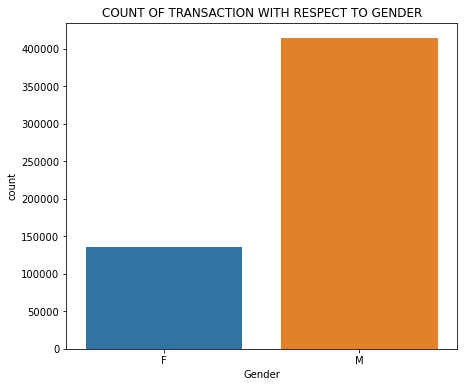

In [9]:
plt.figure(figsize=(7,6))
sns.countplot(data=data,x='Gender')
plt.title('COUNT OF TRANSACTION WITH RESPECT TO GENDER')

plt.show()

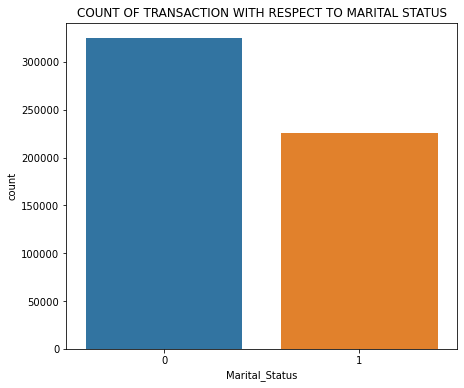

In [10]:
plt.figure(figsize=(7,6))
sns.countplot(data=data,x='Marital_Status')
plt.title('COUNT OF TRANSACTION WITH RESPECT TO MARITAL STATUS')
plt.show()

In [11]:
data['Age'].value_counts().reset_index().rename(columns={'index':'age','Age':'counts'})

,age,counts
0,26-35,219587
1,36-45,110013
2,18-25,99660
3,46-50,45701
4,51-55,38501
5,55+,21504
6,0-17,15102


In [12]:
age_percent =  data['Age'].value_counts(normalize=True).reset_index().rename(columns={'index':'age','Age':'percent'})
age_percent

,age,percent
0,26-35,0.399200
1,36-45,0.199999
2,18-25,0.181178
3,46-50,0.083082
4,51-55,0.069993
5,55+,0.039093
6,0-17,0.027455


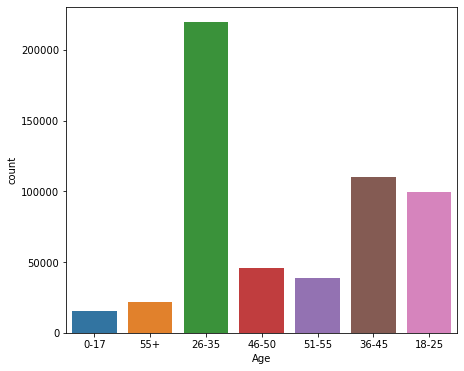

In [13]:
plt.figure(figsize=(7,6))
sns.countplot(data=data,x='Age')
plt.show()

In [14]:
data[data['Gender']=='F']['Age'].value_counts(normalize=True)

26-35    0.373701
36-45    0.200060
18-25    0.181343
46-50    0.097188
51-55    0.072852
0-17     0.037428
55+      0.037428
Name: Age, dtype: float64

In [15]:
data[data['Gender']=='M']['Age'].value_counts(normalize=True)

26-35    0.407559
36-45    0.199979
18-25    0.181123
46-50    0.078458
51-55    0.069056
55+      0.039639
0-17     0.024185
Name: Age, dtype: float64

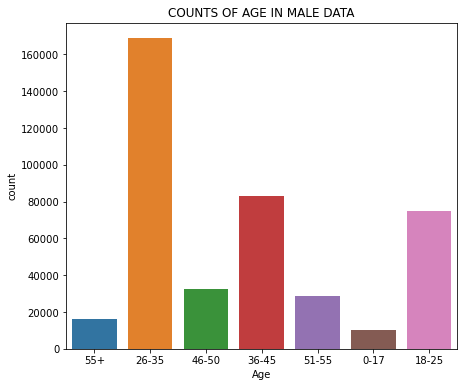

In [16]:
plt.figure(figsize=(7,6))

sns.countplot(data=data[data['Gender']=='M'],x='Age')
plt.title('COUNTS OF AGE IN MALE DATA')
plt.show()

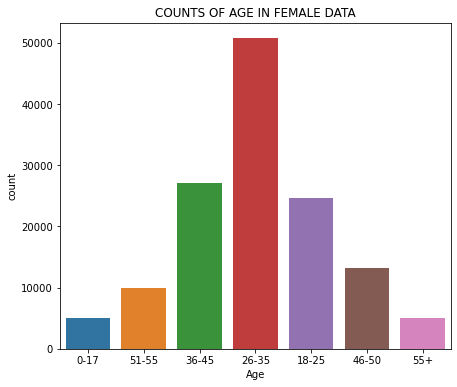

In [17]:
plt.figure(figsize=(7,6))
sns.countplot(data=data[data['Gender']=='F'],x='Age')
plt.title('COUNTS OF AGE IN FEMALE DATA')

plt.show()

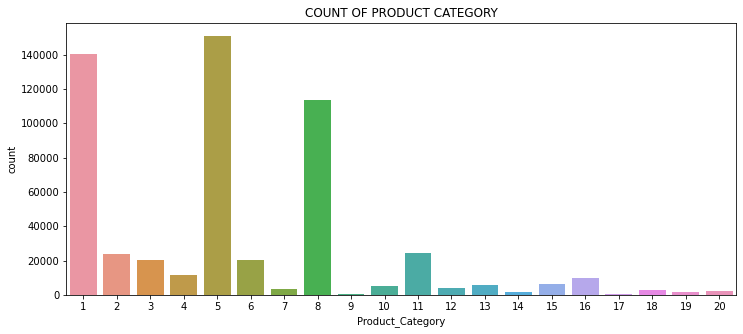

In [18]:
plt.figure(figsize=(12, 5))
sns.countplot(data=data, x='Product_Category')
plt.title('COUNT OF PRODUCT CATEGORY')
plt.show()

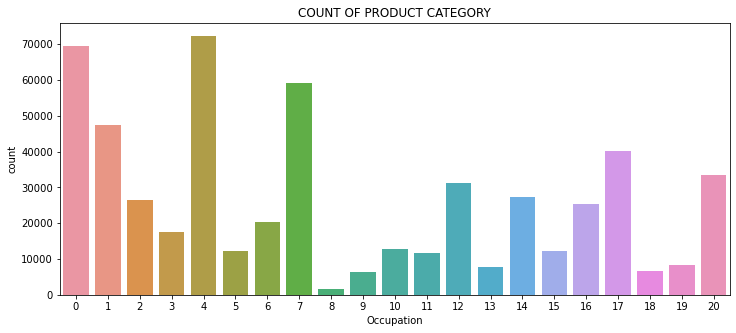

In [19]:
plt.figure(figsize=(12, 5))
sns.countplot(data=data, x='Occupation')
plt.title('COUNT OF PRODUCT CATEGORY')
plt.show()

In [20]:
data.groupby(['User_ID','City_Category'])['City_Category'].value_counts()

User_ID  City_Category  City_Category
1000001  A              A                 35
1000002  C              C                 77
1000003  A              A                 29
1000004  B              B                 14
1000005  A              A                106
                                        ... 
1006036  B              B                514
1006037  C              C                122
1006038  C              C                 12
1006039  B              B                 74
1006040  B              B                180
Name: City_Category, Length: 5891, dtype: int64

In [21]:
data.groupby(['User_ID','City_Category'])['City_Category'].value_counts().to_frame()

,,,City_Category
User_ID,City_Category,City_Category,
1000001,A,A,35
1000002,C,C,77
1000003,A,A,29
1000004,B,B,14
1000005,A,A,106
...,...,...,...
1006036,B,B,514
1006037,C,C,122
1006038,C,C,12


In [22]:
data.groupby(['User_ID','City_Category'])['City_Category'].nunique()

User_ID  City_Category
1000001  A                1
1000002  C                1
1000003  A                1
1000004  B                1
1000005  A                1
                         ..
1006036  B                1
1006037  C                1
1006038  C                1
1006039  B                1
1006040  B                1
Name: City_Category, Length: 5891, dtype: int64

In [23]:
type(data.groupby(['User_ID','City_Category'])['City_Category'].nunique())

pandas.core.series.Series

In [24]:
data.groupby(['User_ID','City_Category'])['City_Category'].nunique().to_frame()

,,City_Category
User_ID,City_Category,
1000001,A,1
1000002,C,1
1000003,A,1
1000004,B,1
1000005,A,1
...,...,...
1006036,B,1
1006037,C,1
1006038,C,1


In [25]:
data.groupby(['User_ID','City_Category'])['City_Category'].nunique().to_frame(name='count')

,,count
User_ID,City_Category,
1000001,A,1
1000002,C,1
1000003,A,1
1000004,B,1
1000005,A,1
...,...,...
1006036,B,1
1006037,C,1
1006038,C,1


In [26]:
city_category_count = data.groupby(['User_ID','City_Category'])['City_Category'].nunique().to_frame(name='count').groupby('City_Category').count().reset_index()
city_category_count

,City_Category,count
0,A,1045
1,B,1707
2,C,3139


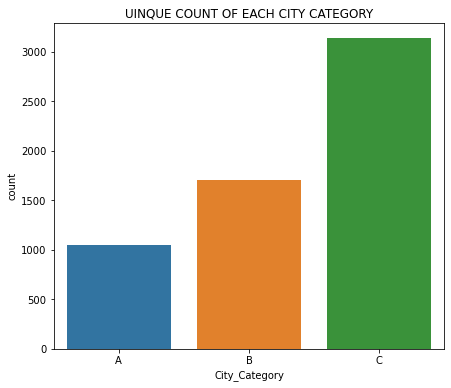

In [27]:
plt.figure(figsize=(7,6))
sns.barplot(data=city_category_count,x='City_Category',y='count')
plt.title('UINQUE COUNT OF EACH CITY CATEGORY')
plt.show()

In [28]:
columns = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
data[columns].melt().groupby(['variable', 'value'])[['value']].count()/len(data)

value
variable                   value          
Age                        0-17   0.027455
                           18-25  0.181178
                           26-35  0.399200
                           36-45  0.199999
                           46-50  0.083082
                           51-55  0.069993
                           55+    0.039093
City_Category              A      0.268549
                           B      0.420263
                           C      0.311189
Gender                     F      0.246895
                           M      0.753105
Marital_Status             0      0.590347
                           1      0.409653
Stay_In_Current_City_Years 0      0.135252
                           1      0.352358
                           2      0.185137
                           3      0.173224
                           4+     0.154028

In [34]:
# AVERAGE PURCHASE OF MALE PER TRANSACTION
np.mean(male_data['Purchase'])

9437.526040472265

In [35]:
# AVERAGE PURCHASE OF FEMALE PER TRANSACTION
np.mean(female_data['Purchase'])

8734.565765155476

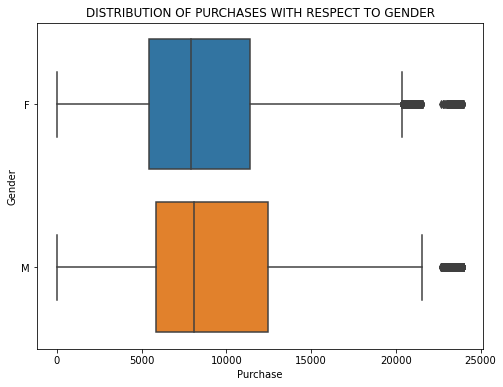

In [30]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data,x='Purchase',y='Gender')
plt.title('DISTRIBUTION OF PURCHASES WITH RESPECT TO GENDER')
plt.show()

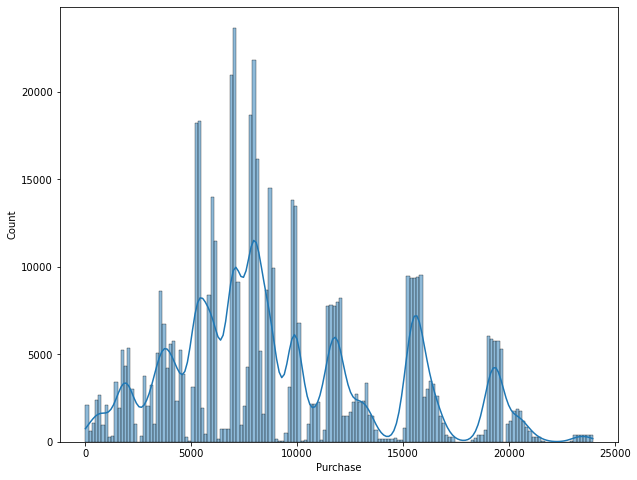

In [31]:
plt.figure(figsize=(10,8))
sns.histplot(data=data['Purchase'],kde=True)
plt.show()

### OBSERVATIONS :

- PEOPLE MOSTLY LIVE IN C CATEGORY CITY.
- COUNT OF MALE IS HIGHER THAN THE FEMALE IN THE DATA i.e. 4225 AND 1666 RESPECTIVILY.
- AGE GROUP OF 26-35 BUYS MORE THAN ANY OTHER GROUPS, BE IT OVERALL DATA, ONLY MALE DATA AND FEMALE DATA.
- THE LEAST AGE GROUP WHICH BUYS ARE 0-17 AND 55+.
- AVERAGE PURCHASE OF MEN ARE MORE THAN FEMALE.

## BIVARIATE ANALYSIS

In [17]:
all_purchase_data = data.groupby(['User_ID','Gender'])[['Purchase']].sum()
all_purchase_data = all_purchase_data.reset_index()
all_purchase_data

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [20]:
male_data = all_purchase_data[all_purchase_data['Gender']=='M']
male_data.head()

,User_ID,Gender,Purchase
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
6,1000007,M,234668


In [21]:
female_data = all_purchase_data[all_purchase_data['Gender']=='F']
female_data.head()

,User_ID,Gender,Purchase
0,1000001,F,334093
5,1000006,F,379930
9,1000010,F,2169510
10,1000011,F,557023
15,1000016,F,150490


<Figure size 792x504 with 0 Axes>

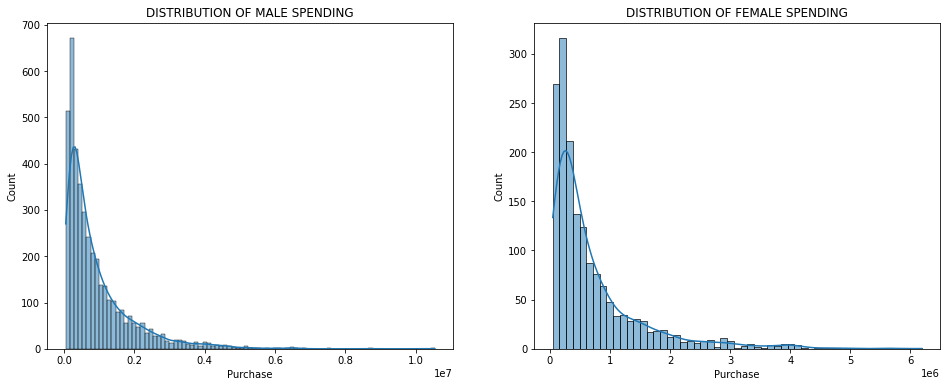

In [22]:
plt.figure(figsize=(11,7))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

sns.histplot(data=male_data['Purchase'],kde=True,ax=axes[0]).set_title('DISTRIBUTION OF MALE SPENDING')
sns.histplot(data=female_data['Purchase'],kde=True,ax=axes[1]).set_title('DISTRIBUTION OF FEMALE SPENDING')

plt.show()

In [23]:
# 25 percentile of male purchase
m_25 = np.percentile(male_data['Purchase'],25)
m_25

258589.0

In [24]:
# 75 percentile of male purchase
m_75 = np.percentile(male_data['Purchase'],75)
m_75

1215237.0

In [25]:
# 50 percentile of male purchase
m_50 = np.percentile(male_data['Purchase'],25)
m_50

258589.0

In [26]:
# IQR of male purchase
m_iqr = m_75 - m_25
m_iqr

956648.0

In [27]:
m_upper_limit = m_75 + 1.5*(m_iqr)
m_upper_limit

2650209.0

In [28]:
# THESE ARE THE POTENTIAL OUTLIERS FOR MALE DATA
male_data[male_data['Purchase']>m_upper_limit]

,User_ID,Gender,Purchase
45,1000048,M,2788504
50,1000053,M,4270371
55,1000058,M,2896836
113,1000117,M,2742646
119,1000123,M,3237092
...,...,...,...
5730,1005880,M,3551677
5766,1005916,M,2932572
5804,1005954,M,4551927
5814,1005964,M,3117743


In [29]:
# 25 percentile of female purchase

f_25 = np.percentile(female_data['Purchase'],25)
f_25

202654.75

In [30]:
# 50 percentile of female purchase

f_50 = np.percentile(female_data['Purchase'],50)
f_50

407263.0

In [31]:
# 75 percentile of female purchase

f_75 = np.percentile(female_data['Purchase'],75)
f_75

873772.0

In [32]:
# IQR of female purchase

f_iqr = f_75 - f_25
f_iqr

671117.25

In [33]:
f_upper_limit = f_75 + 1.5 * f_iqr
f_upper_limit

1880447.875

In [34]:
# THESE ARE THE POTENTIAL OUTLIERS FOR FEMALE DATA

female_data[female_data['Purchase']>f_upper_limit]

,User_ID,Gender,Purchase
9,1000010,F,2169510
17,1000018,F,1979047
59,1000062,F,2513618
142,1000146,F,2257255
147,1000151,F,2560797
...,...,...,...
5728,1005878,F,2981466
5805,1005955,F,1949208
5822,1005972,F,2086643
5846,1005996,F,3021711


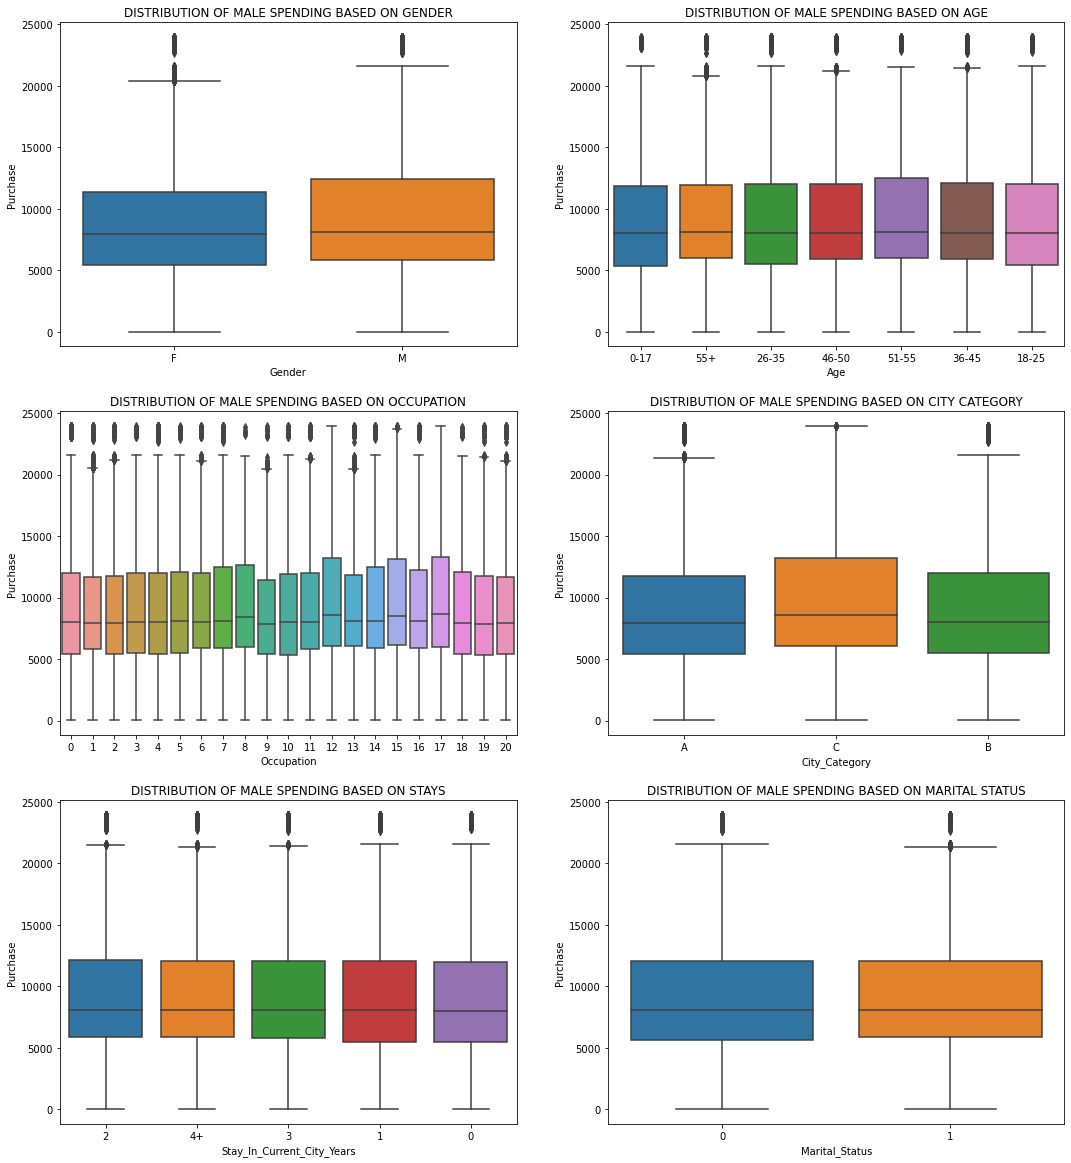

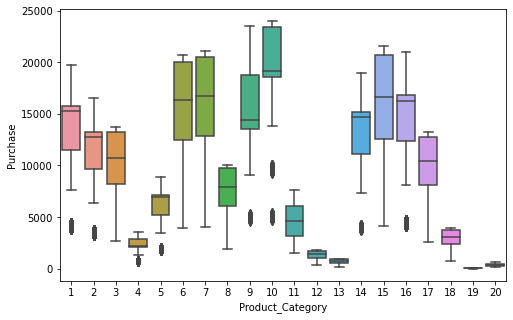

In [51]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18,12))
fig.subplots_adjust(top=1.4)

sns.boxplot(data=data,x='Gender',y='Purchase',ax=axes[0,0]).set_title('DISTRIBUTION OF MALE SPENDING BASED ON GENDER')
sns.boxplot(data=data,x='Age',y='Purchase',ax=axes[0,1]).set_title('DISTRIBUTION OF MALE SPENDING BASED ON AGE')
sns.boxplot(data=data,x='Occupation',y='Purchase',ax=axes[1,0]).set_title('DISTRIBUTION OF MALE SPENDING BASED ON OCCUPATION')
sns.boxplot(data=data,x='City_Category',y='Purchase',ax=axes[1,1]).set_title('DISTRIBUTION OF MALE SPENDING BASED ON CITY CATEGORY')
sns.boxplot(data=data,x='Stay_In_Current_City_Years',y='Purchase',ax=axes[2,0]).set_title('DISTRIBUTION OF MALE SPENDING BASED ON STAYS')
sns.boxplot(data=data,x='Marital_Status',y='Purchase',ax=axes[2,1]).set_title('DISTRIBUTION OF MALE SPENDING BASED ON MARITAL STATUS')

plt.figure(figsize=(8, 5))
sns.boxplot(data=data, y='Purchase', x='Product_Category')
plt.show()

### OBSERVATIONS :

- 1. Among differnt age categories, we see similar purchase behaviour. For all age groups, most of the purchases are of the values between 5k to 12k with all have some outliers.
- 2. We see variations among product categories. Product category 10 products are the costliest ones. Also, there are few outliers for some of the product categories.
- 3. Among different occupation as well, we see similar purchasing behaviour in terms of the purchase values.

- 4. The spending pattern for males and females are similar as we can see from the above histplot. Males purchasing value are little range than females.
- 5. Similarly for City category, stay in current city years, marital status - we see the users spends mostly in the range of 5k to 12k.


## MULTIVARIATE ANALYSIS

In [52]:
data.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200


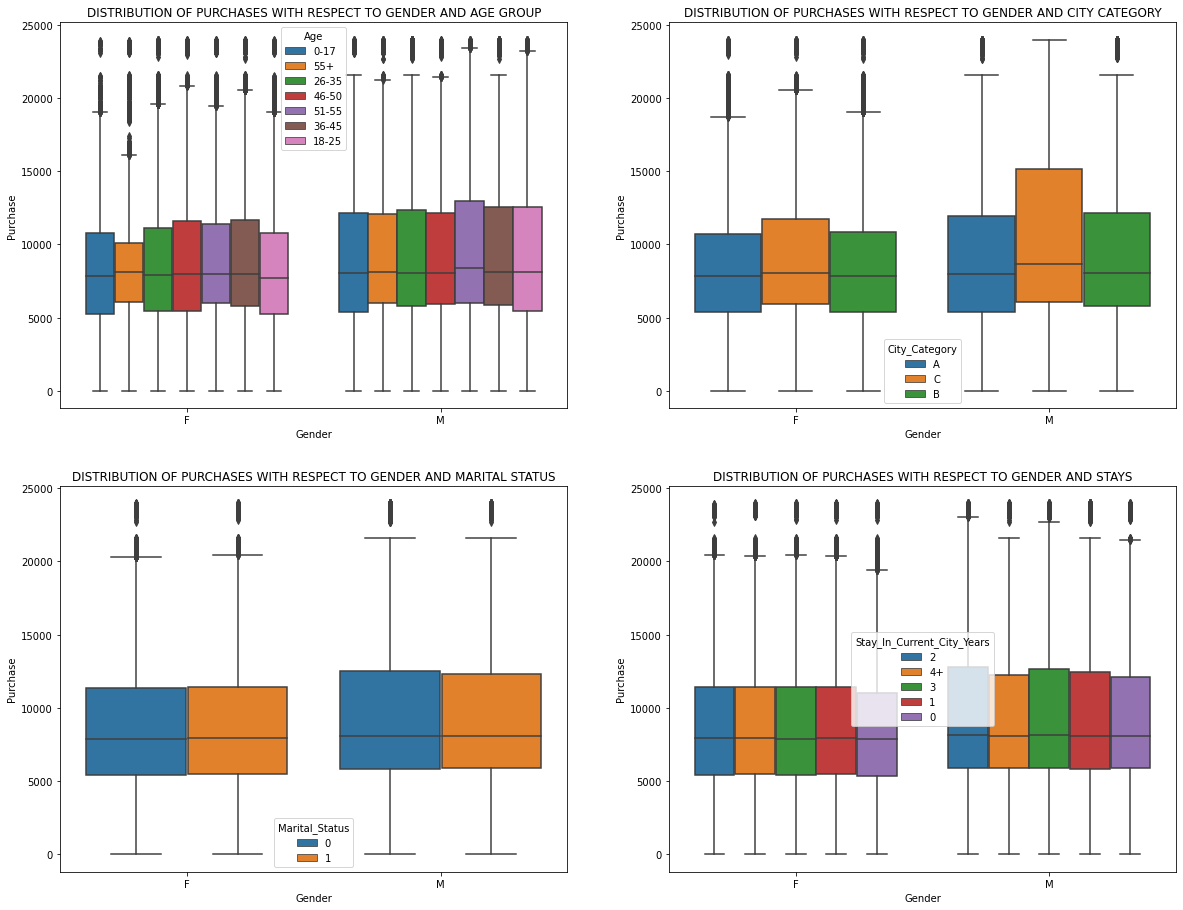

In [53]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))
fig.subplots_adjust(top=1.6)
sns.boxplot(data=data, y='Purchase', x='Gender', hue='Age', ax=axs[0,0]).set_title('DISTRIBUTION OF PURCHASES WITH RESPECT TO GENDER AND AGE GROUP')
sns.boxplot(data=data, y='Purchase', x='Gender', hue='City_Category', ax=axs[0,1]).set_title('DISTRIBUTION OF PURCHASES WITH RESPECT TO GENDER AND CITY CATEGORY')
sns.boxplot(data=data, y='Purchase', x='Gender', hue='Marital_Status', ax=axs[1,0]).set_title('DISTRIBUTION OF PURCHASES WITH RESPECT TO GENDER AND MARITAL STATUS')
sns.boxplot(data=data, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', ax=axs[1,1]).set_title('DISTRIBUTION OF PURCHASES WITH RESPECT TO GENDER AND STAYS')

plt.show()

### OBSERVATIONS :

- 3. Males and females spending behaviour remains similar when we take marital status into account.
- 1. The purchasing pattern is very much similar for males and females even with differnt age groups.
- 4. Purchase values are very similar for males and females on the basis of Stay_in_current_city_years.
- 2. The purchasing pattern of males and females on the basis of different cities categories is also similar in nature.
- 5. Males from city category B tends to purchase costlier products in comparison to females.
- 6. Outliers in females with respect to every category are vast.


### 3.1

In [35]:
# AVERAGE PURCHASE OF MALE PER TRANSACTION
np.mean(male_data['Purchase'])

925344.4023668639

In [36]:
# AVERAGE PURCHASE OF FEMALE PER TRANSACTION
np.mean(female_data['Purchase'])

712024.3949579832

#### SAMPLE MEAN OF PURCHASE(POPULATION)

In [37]:
pop_sample_mean = []
for i in range(2000):
    a = np.random.choice(all_purchase_data['Purchase'],200)
    p_avg = np.mean(a)
    pop_sample_mean.append(p_avg)

In [38]:
pop_sample_mean[:5]

[835722.97, 811288.265, 771538.37, 970841.16, 811817.46]

In [39]:
np.mean(pop_sample_mean)

866487.9325574999

In [40]:
np.std(pop_sample_mean)

65270.03497118809

In [41]:
np.mean(data['Purchase'])

9263.968712959126

In [42]:
np.std(pop_sample_mean)/np.sqrt(200)

4615.28843364102

In [ ]:
# 95% CI

In [ ]:
# MU +- 1.95 * SE 

In [43]:
p_x1 = np.mean(pop_sample_mean) + 1.96 * np.std(pop_sample_mean)/np.sqrt(200)
p_x1

875533.8978874362

In [44]:
p_x2 = np.mean(pop_sample_mean) - 1.96 * np.std(pop_sample_mean)/np.sqrt(200)
p_x2

857441.9672275635

<AxesSubplot:ylabel='Count'>

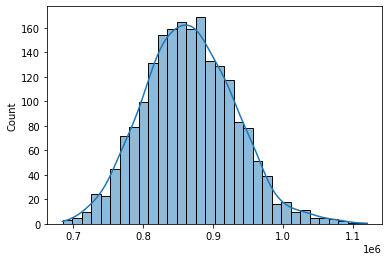

In [45]:
sns.histplot(pop_sample_mean,kde=True)

#### WITH 95% CONFIDENCE INTERVAL POPULATION SAMPLE MEAN WILL LIE IN ( 857441.967 - 875533.897)

In [94]:
male_sample_means = []
for i in range(2000):
    a = np.random.choice(male_data['Purchase'],3000)
    avg = np.mean(a)
    male_sample_means.append(avg)

In [95]:
male_sample_mean =  np.mean(male_sample_means)
male_sample_mean

925846.3373963333

In [96]:
male_sample_std = np.std(male_sample_means)
male_sample_std

17700.69687110966

In [97]:
m_x1 = np.mean(male_sample_mean) - 1.96 * male_sample_std
m_x1

891152.9715289584

In [98]:
m_x2 = np.mean(male_sample_mean) + 1.96 * male_sample_std
m_x2

960539.7032637083

<AxesSubplot:ylabel='Count'>

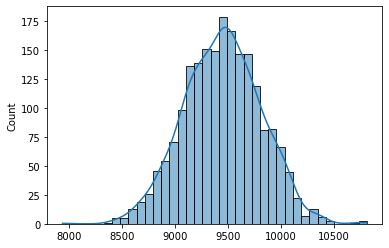

In [71]:
sns.histplot(male_sample_mean,kde=True)

#### WITH 95% CONFIDENCE INTERVAL MALE POPULATION SAMPLE MEAN WILL LIE IN (890030.810 - 959993.476 )

In [99]:
female_sample_means = []
for i in range(2000):
    a = np.random.choice(female_data['Purchase'],1500)
    avg = np.mean(a)
    female_sample_means.append(avg)

In [100]:
female_sample_mean = np.mean(female_sample_means)
female_sample_mean

712634.7316646667

In [101]:
female_sample_std = np.std(female_sample_means)
female_sample_std

21435.511369355365

In [102]:
# STANDARD ERROR
np.std(female_sample_means)/np.sqrt(1500)

553.4625236730204

In [103]:
f_x1 = female_sample_mean - 1.96 * female_sample_std
f_x1

670621.1293807302

In [104]:
f_x2 = female_sample_mean + 1.96 * female_sample_std
f_x2

754648.3339486031

<AxesSubplot:ylabel='Count'>

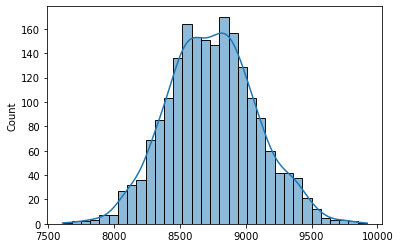

In [78]:
sns.histplot(female_sample_mean,kde=True)

#### WITH 95% CONFIDENCE INTERVAL FEMALE POPULATION SAMPLE MEAN WILL LIE IN ( 670621.129 - 754648.333 )

### OBSERVATIONS :

- 1. THE AVERAGE POPULATION MEAN OF MALE IS HIGHER THAN THE FEMALE.
- 2. WITH 95% CONFIDENCE INTERVAL POPULATION SAMPLE MEAN WILL LIE IN ( 9332.324 - 9234.814 ).
- 3. WITH 95% CONFIDENCE INTERVAL MALE POPULATION SAMPLE MEAN WILL LIE IN ( 9395.095 - 9494.412 ).
- 4. WITH 95% CONFIDENCE INTERVAL FEMALE POPULATION SAMPLE MEAN WILL LIE IN ( 8688.753 - 8784.689 ).
- 5. FROM ABOVE TESTS WE COULD CONCLUDE THAT 95% OF TIME MALE AVERAGE MEAN WILL BE HIGHER THAN FEMALE.

In [79]:
data.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [106]:
female_data

,User_ID,Gender,Purchase
0,1000001,F,334093
5,1000006,F,379930
9,1000010,F,2169510
10,1000011,F,557023
15,1000016,F,150490
...,...,...,...
5885,1006035,F,956645
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034


In [107]:
male_data

,User_ID,Gender,Purchase
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
6,1000007,M,234668
...,...,...,...
5880,1006030,M,737361
5882,1006032,M,517261
5883,1006033,M,501843
5884,1006034,M,197086


### WITH 90% CONFIDENCE INTERVAL

#### FOR FEMALE

In [115]:
f_purchase_sample_mean = []
for i in range(2000):
    a = np.random.choice(female_data['Purchase'],1500)
    p_avg = np.mean(a)
    f_purchase_sample_mean.append(p_avg)

In [116]:
np.mean(f_purchase_sample_mean)

711294.4804509999

In [117]:
np.std(f_purchase_sample_mean)

20278.642203752723

In [126]:
f_purchase_x1 = np.mean(f_purchase_sample_mean) - 1.645 * np.std(f_purchase_sample_mean)
f_purchase_x1

677936.1140258267

In [119]:
f_purchase_x2 = np.mean(f_purchase_sample_mean) + 1.645 * np.std(f_purchase_sample_mean)
f_purchase_x2

744652.8468761732

<AxesSubplot:ylabel='Count'>

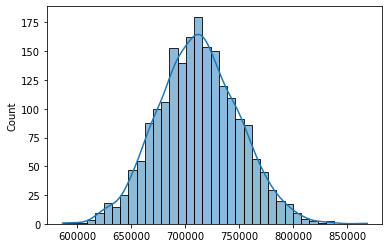

In [89]:
sns.histplot(data=f_purchase_sample_mean,kde=True)

#### WITH 90% CONFIDENCE INTERVAL, WE CAN SAY THAT MEAN VALUE OF FEMALE PURCHASES LIES BETWEEN RANGE 670440.925 - 754464.877

#### FOR MALE

In [120]:
m_purchase_sample_mean = []
for i in range(2000):
    a = np.random.choice(male_data['Purchase'],3000)
    p_avg = np.mean(a)
    m_purchase_sample_mean.append(p_avg)

In [121]:
np.mean(m_purchase_sample_mean)

924324.2904443333

In [122]:
np.std(m_purchase_sample_mean)

18208.95427421146

In [123]:
m_purchase_x1 = np.mean(m_purchase_sample_mean) - 1.645 * np.std(m_purchase_sample_mean)
m_purchase_x1

894370.5606632555

In [124]:
m_purchase_x2 = np.mean(m_purchase_sample_mean) + 1.645 * np.std(m_purchase_sample_mean)
m_purchase_x2

954278.0202254112

<AxesSubplot:ylabel='Count'>

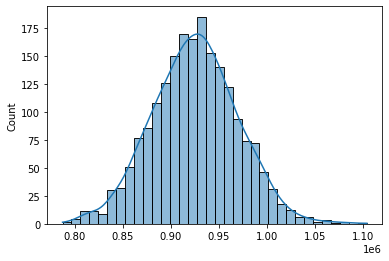

In [96]:
sns.histplot(data=m_purchase_sample_mean,kde=True)

#### WITH 90% CONFIDENCE INTERVAL, WE CAN SAY THAT MEAN VALUE OF MALE PURCHASES LIES BETWEEN RANGE 894370.560 - 954278.020

### WITH 95% CONFIDENCE INTERVAL

#### FOR FEMALE

In [128]:
f_purchase_95_x1 = np.mean(f_purchase_sample_mean) - 1.96 * np.std(f_purchase_sample_mean)
f_purchase_95_x1

671548.3417316446

In [129]:
f_purchase_95_x2 = np.mean(f_purchase_sample_mean) + 1.96 * np.std(f_purchase_sample_mean)/np.sqrt(500)
f_purchase_95_x2

713071.9818113922

In [130]:
f_purchase_95_x1,f_purchase_95_x2

(671548.3417316446, 713071.9818113922)

#### WITH 95% CONFIDENCE INTERVAL WE CAN SAY THAT THE MEAN VALUE OF FEMALE PURCHASES LIES BETWEEN RANGE 671548.341 - 713071.981

#### FOR MALE

In [131]:
m_purchase_95_x1 = np.mean(m_purchase_sample_mean) - 1.96 * np.std(m_purchase_sample_mean)
m_purchase_95_x1

888634.7400668788

In [132]:
m_purchase_95_x2 = np.mean(m_purchase_sample_mean) + 1.96 * np.std(m_purchase_sample_mean)
m_purchase_95_x2

960013.8408217878

In [133]:
m_purchase_x1,m_purchase_x2

(894370.5606632555, 954278.0202254112)

#### WITH 95% CONFIDENCE INTERVAL WE CAN SAY THAT THE MEAN VALUE OF MALE PURCHASES LIES BETWEEN RANGE 894370.560 - 954278.020

### WITH 99% CONFIDENCE INTERVAL

#### FOR FEMALE

In [134]:
f_purchase_99_x1 = np.mean(f_purchase_sample_mean) - 2.576 * np.std(f_purchase_sample_mean)
f_purchase_99_x1

659056.6981341329

In [135]:
f_purchase_99_x2 = np.mean(f_purchase_sample_mean) + 2.576 * np.std(f_purchase_sample_mean)/np.sqrt(500)
f_purchase_99_x2

713630.625096087

In [136]:
f_purchase_99_x1,f_purchase_99_x2

(659056.6981341329, 713630.625096087)

#### WITH 99% CONFIDENCE INTERVAL WE CAN SAY THAT THE MEAN VALUE OF FEMALE PURCHASES LIES BETWEEN RANGE 659056.698 - 713630.625

#### FOR MALE

In [137]:
m_purchase_99_x1 = np.mean(m_purchase_sample_mean) - 2.576 * np.std(m_purchase_sample_mean)
m_purchase_99_x1

877418.0242339646

In [138]:
m_purchase_99_x2 = np.mean(m_purchase_sample_mean) + 2.576 * np.std(m_purchase_sample_mean)
m_purchase_99_x2

971230.556654702

In [139]:
m_purchase_99_x1,m_purchase_99_x2

(877418.0242339646, 971230.556654702)

#### WITH 99% CONFIDENCE INTERVAL WE CAN SAY THAT THE MEAN VALUE OF MALE PURCHASES LIES BETWEEN RANGE 877418.024 - 971230.556

### Q. OVERLAP OR NOT

#### FOR MALE WITH 95% CONFIDENCE INTERVAL

In [140]:
m_purchase_95_x1 = np.mean(m_purchase_sample_mean) - 1.96 * np.std(m_purchase_sample_mean)
m_purchase_95_x1

888634.7400668788

In [141]:
m_purchase_95_x2 = np.mean(m_purchase_sample_mean) + 1.96 * np.std(m_purchase_sample_mean)
m_purchase_95_x2

960013.8408217878

In [142]:
m_purchase_95_x1,m_purchase_95_x2

(888634.7400668788, 960013.8408217878)

#### FOR FEMALE WITH 95% CONFIDENCE INTERVAL

In [143]:
f_purchase_95_x1 = np.mean(f_purchase_sample_mean) - 1.96 * np.std(f_purchase_sample_mean)
f_purchase_95_x1

671548.3417316446

In [144]:
f_purchase_95_x2 = np.mean(f_purchase_sample_mean) + 1.96 * np.std(f_purchase_sample_mean)
f_purchase_95_x2

751040.6191703553

In [145]:
f_purchase_95_x1,f_purchase_95_x2

(671548.3417316446, 751040.6191703553)

### OBSERVATIONS :

#### SINCE NOT WITH ONLY 95% CONFIDENCE INTERVAL BUT WITH  EITHER  OF THEM, THE INTERVALS DOES NOT OVERLAPPED. 

#### THEREFORE WALLMART SHOULD TARGET MORE ON MALE CUSTOMERS AS THEIR MEAN SPENDINGS ARE MORE THAN FEMALE.

In [ ]:
# Q 6A

In [115]:
data.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [146]:
marital_data = data.groupby(['User_ID','Marital_Status'])['Purchase'].sum().reset_index()
marital_data

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
3,1000004,1,206468
4,1000005,1,821001
...,...,...,...
5886,1006036,1,4116058
5887,1006037,0,1119538
5888,1006038,0,90034
5889,1006039,1,590319


In [147]:
singles = marital_data[marital_data['Marital_Status']==0]
singles

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
5,1000006,0,379930
8,1000009,0,594099
...,...,...,...
5884,1006034,0,197086
5885,1006035,0,956645
5887,1006037,0,1119538
5888,1006038,0,90034


In [148]:
married = marital_data[marital_data['Marital_Status']==1]
married

,User_ID,Marital_Status,Purchase
3,1000004,1,206468
4,1000005,1,821001
6,1000007,1,234668
7,1000008,1,796593
9,1000010,1,2169510
...,...,...,...
5879,1006029,1,157436
5880,1006030,1,737361
5883,1006033,1,501843
5886,1006036,1,4116058


In [149]:
singles_purchase_sample_mean = []
married_purchase_sample_mean = []

for i in range(2000):
    a = np.random.choice(singles['Purchase'],1000)
    aa = np.random.choice(married['Purchase'],1000)
    a_avg = np.mean(a)
    aa_avg = np.mean(aa)
    singles_purchase_sample_mean.append(a_avg)
    married_purchase_sample_mean.append(aa_avg)

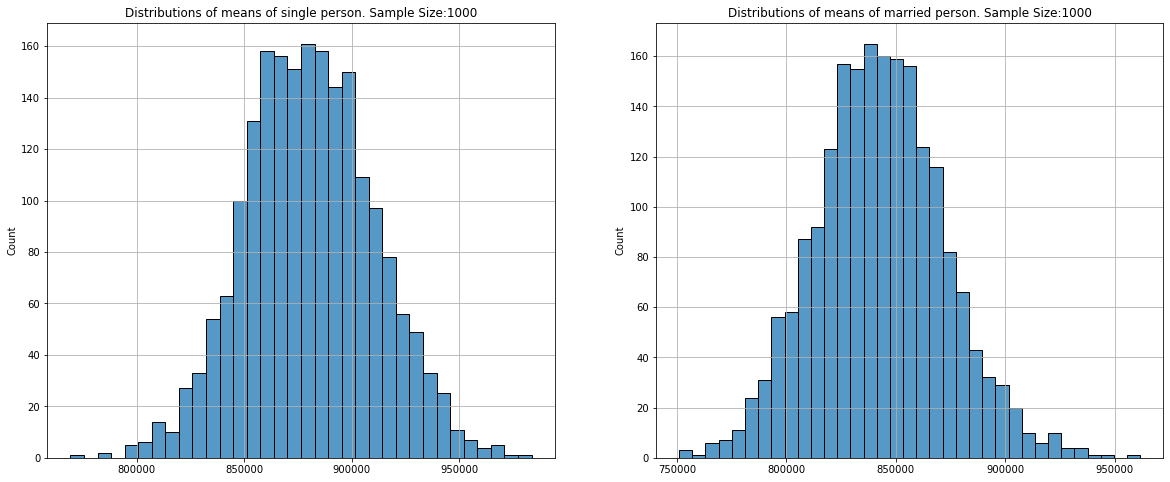

In [150]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.histplot(singles_purchase_sample_mean)
plt.title('Distributions of means of single person. Sample Size:1000')
plt.grid()

plt.subplot(1,2,2)
sns.histplot(married_purchase_sample_mean)
plt.title('Distributions of means of married person. Sample Size:1000')
plt.grid()

plt.show()

### WITH 90% CONFIDENCE INTERVAL

In [151]:
single_s_mean = np.mean(singles_purchase_sample_mean)
married_s_mean = np.mean(married_purchase_sample_mean)

In [152]:
single_std =  np.std(singles_purchase_sample_mean)
single_std

30098.407448420905

In [153]:
married_std = np.std(married_purchase_sample_mean)
married_std

29499.78054916535

In [154]:
single_s_mean = np.mean(singles_purchase_sample_mean)
married_s_mean = np.mean(married_purchase_sample_mean)

In [126]:
# single_se = single_std/np.sqrt(1000)
# married_se = married_std/np.sqrt(1000)

In [155]:
single_upper_limit = single_s_mean -1.645 * single_std
single_upper_limit

831031.6179693476

In [156]:
single_lower_limit = single_s_mean +1.645 * single_std
single_lower_limit

930055.3784746523

In [157]:
married_upper_limit = married_s_mean - 1.645 * married_std
married_lower_limit = married_s_mean + 1.645 * married_std

In [158]:
married_upper_limit,married_lower_limit

(794203.301618123, 891257.5796248771)

In [159]:
print("Single CI :",[single_upper_limit,single_lower_limit])
print("Married CI :",[married_upper_limit,married_lower_limit])

Single CI : [831031.6179693476, 930055.3784746523]
Married CI : [794203.301618123, 891257.5796248771]


### OBSERVATIONS :

#### FOR SINGLES : 
#### WITH 90% CONFIDENCE INTERVAL WE CAN SAY THAT TRUE POPULATION WILL LIE BETWEEN RANGE 831031.6179693476, 930055.3784746523

#### FOR MARRIED : 
#### WITH 90% CONFIDENCE INTERVAL WE CAN SAY THAT TRUE POPULATION WILL LIE BETWEEN RANGE 794203.301618123, 891257.5796248771

### WITH 95% CONFIDENCE INTERVAL

In [160]:
single_upper_limit = single_s_mean -1.96 * single_std
single_lower_limit = single_s_mean +1.96 * single_std

In [161]:
married_upper_limit = married_s_mean -1.96 * single_std
married_lower_limit = married_s_mean +1.96 * single_std

In [162]:
print("Single CI :",[single_upper_limit,single_lower_limit])
print("Married CI :",[married_upper_limit,married_lower_limit])

Single CI : [821550.619623095, 939536.3768209049]
Married CI : [783737.5620225951, 901723.319220405]


### OBSERVATIONS :

#### FOR SINGLES : 
#### WITH 95% CONFIDENCE INTERVAL WE CAN SAY THAT TRUE POPULATION WILL LIE BETWEEN RANGE 821550.619623095, 939536.3768209049

#### FOR MARRIED : 
#### WITH 95% CONFIDENCE INTERVAL WE CAN SAY THAT TRUE POPULATION WILL LIE BETWEEN RANGE 783737.5620225951, 901723.319220405

### WITH 99% CONFIDENCE INTERVAL

In [135]:
single_upper_limit = single_s_mean - 2.576 * single_std        
single_lower_limit = single_s_mean + 2.576 * single_std

In [163]:
married_upper_limit = married_s_mean - 2.576 * single_std  
married_lower_limit = married_s_mean + 2.576 * single_std  

In [164]:
print("Single CI :",[single_upper_limit,single_lower_limit])
print("Married CI :",[married_upper_limit,married_lower_limit])

Single CI : [821550.619623095, 939536.3768209049]
Married CI : [765196.9430343678, 920263.9382086323]


### OBSERVATIONS :

#### FOR SINGLES : 
#### WITH 95% CONFIDENCE INTERVAL WE CAN SAY THAT TRUE POPULATION WILL LIE BETWEEN RANGE 821550.619623095, 939536.3768209049


#### FOR MARRIED : 
#### WITH 95% CONFIDENCE INTERVAL WE CAN SAY THAT TRUE POPULATION WILL LIE BETWEEN RANGE 765196.9430343678, 920263.9382086323

#### For married and singles, it can be seen with larger sample size the sample mean gets closer to tthe population mean. And at greater confidence interval, the range increases.

In [ ]:
# Q 6B

In [138]:
data.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422


In [165]:
age_data = data.groupby(['User_ID','Age'])['Purchase'].sum().reset_index()
age_data

,User_ID,Age,Purchase
0,1000001,0-17,334093
1,1000002,55+,810472
2,1000003,26-35,341635
3,1000004,46-50,206468
4,1000005,26-35,821001
...,...,...,...
5886,1006036,26-35,4116058
5887,1006037,46-50,1119538
5888,1006038,55+,90034
5889,1006039,46-50,590319


In [166]:
age_data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [167]:
age_data['Age'].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

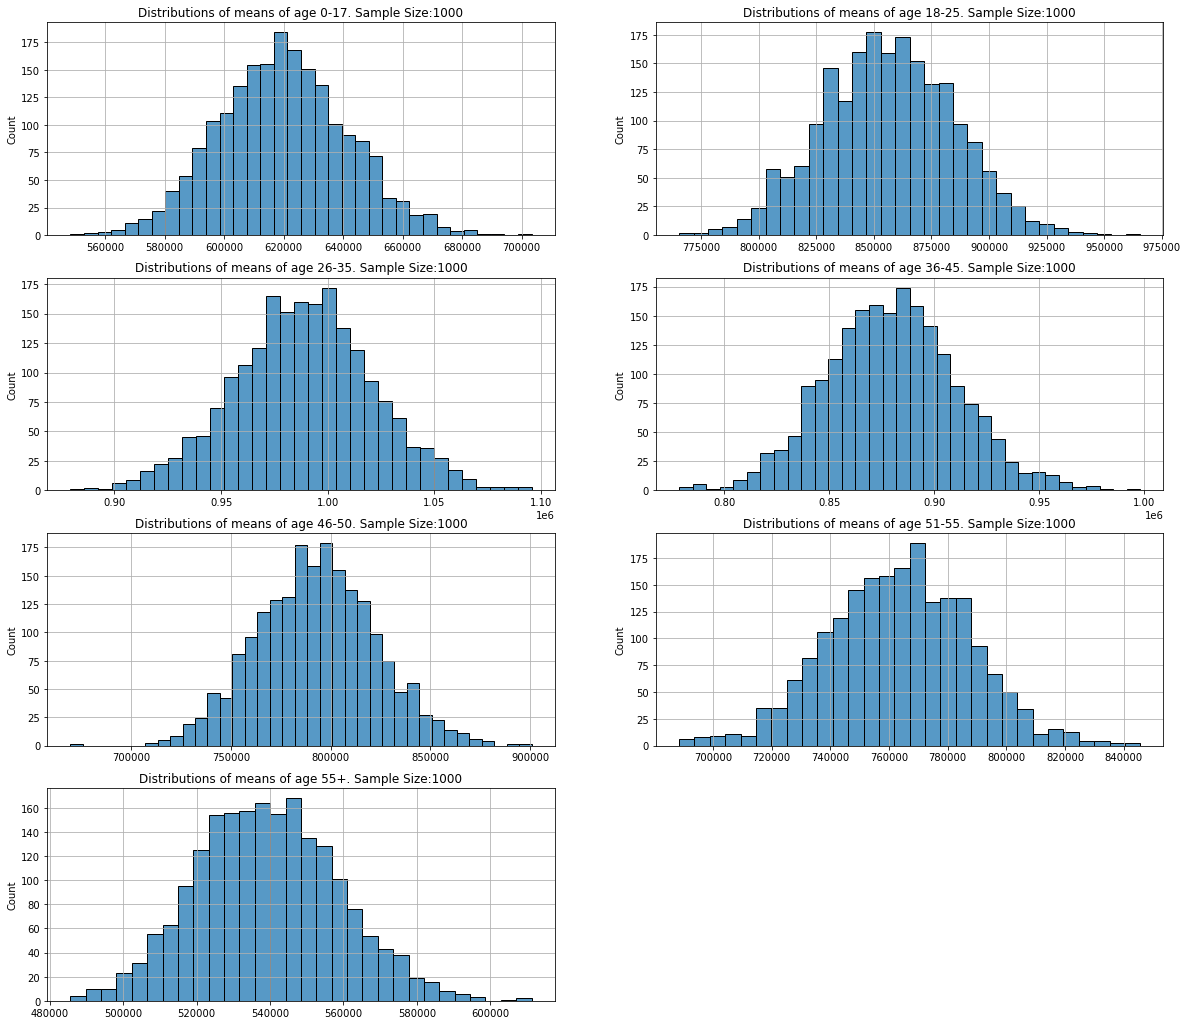

In [170]:
sample_all_age_mean = {}
for i in age_data['Age'].unique():
    sample_all_age_mean[i]=[]

for i in age_data['Age'].unique():
    age_i = age_data[age_data['Age']==i]
    sample_age_mean_i = []

    for j in range(2000):
        sample_i_age = np.random.choice(age_i['Purchase'],1000)
        sample_mean_i = np.mean(sample_i_age)
        sample_all_age_mean[i].append(sample_mean_i)
    
plt.figure(figsize=(20,18))

plt.subplot(4,2,1)
sns.histplot(sample_all_age_mean['0-17'])
plt.title('Distributions of means of age 0-17. Sample Size:1000')
plt.grid()  

plt.subplot(4,2,2)
sns.histplot(sample_all_age_mean['18-25'])
plt.title('Distributions of means of age 18-25. Sample Size:1000')
plt.grid()

plt.subplot(4,2,3)
sns.histplot(sample_all_age_mean['26-35'])
plt.title('Distributions of means of age 26-35. Sample Size:1000')
plt.grid()  

plt.subplot(4,2,4)
sns.histplot(sample_all_age_mean['36-45'])
plt.title('Distributions of means of age 36-45. Sample Size:1000')
plt.grid()

plt.subplot(4,2,5)
sns.histplot(sample_all_age_mean['46-50'])
plt.title('Distributions of means of age 46-50. Sample Size:1000')
plt.grid()

plt.subplot(4,2,6)
sns.histplot(sample_all_age_mean['51-55'])
plt.title('Distributions of means of age 51-55. Sample Size:1000')
plt.grid()  

plt.subplot(4,2,7)
sns.histplot(sample_all_age_mean['55+'])
plt.title('Distributions of means of age 55+. Sample Size:1000')
plt.grid()

### OBSERVATIONS :

#### The means sample seems to be normally distributed for all age groups. Also, we can see the mean of the sample means are closer to the population mean as per central limit theorem.

### WITH 90% CONFIDENCE INTERVAL

In [171]:
# for std
sample_all_age_std = {}
for i in age_data['Age'].unique():
    sample_all_age_std[i]=[]

for i in age_data['Age'].unique():
    sample_all_age_std[i].append(np.std(sample_all_age_mean[i]))   

    
# for mean    
all_age_sample_mean = {}
for i in age_data['Age'].unique():
    all_age_sample_mean[i]=[]
    
for i in age_data['Age'].unique():
    all_age_sample_mean[i].append(np.mean(sample_all_age_mean[i]))

 

In [176]:
for i in age_data['Age'].unique():
    upper_limit = all_age_sample_mean[i][0] - 1.645 * sample_all_age_std[i][0]
    lower_limit = all_age_sample_mean[i][0] + 1.645 * sample_all_age_std[i][0]
    print(f"For age {i}, population mean : {all_age_sample_mean[i]}")
    print(f"For age {i}, 90% confidence interval of true mean value lie in : {upper_limit,lower_limit}")
    print()

For age 0-17, population mean : [619790.5971660002]
For age 0-17, 90% confidence interval of true mean value lie in : (584080.372372144, 655500.8219598563)

For age 55+, population mean : [539346.5477015]
For age 55+, 90% confidence interval of true mean value lie in : (507371.135835113, 571321.959567887)

For age 26-35, population mean : [988669.325719]
For age 26-35, 90% confidence interval of true mean value lie in : (935327.2745233746, 1042011.3769146253)

For age 46-50, population mean : [792999.9966254999]
For age 46-50, 90% confidence interval of true mean value lie in : (744118.3282914382, 841881.6649595617)

For age 51-55, population mean : [763240.1257945]
For age 51-55, 90% confidence interval of true mean value lie in : (723159.0830996042, 803321.1684893958)

For age 36-45, population mean : [879696.934688]
For age 36-45, 90% confidence interval of true mean value lie in : (828299.7216237267, 931094.1477522734)

For age 18-25, population mean : [856263.030861]
For age 18-25

### WITH 95% CONFIDENCE INTERVAL

In [177]:
for i in age_data['Age'].unique():
    upper_limit = all_age_sample_mean[i][0] - 1.96 * sample_all_age_std[i][0]
    lower_limit = all_age_sample_mean[i][0] + 1.96 * sample_all_age_std[i][0]
    print(f"For age {i}, population mean : {all_age_sample_mean[i]}")
    print(f"For age {i}, 95% confidence interval of true mean value lie in : {upper_limit,lower_limit}")
    print()

For age 0-17, population mean : [619790.5971660002]
For age 0-17, 95% confidence interval of true mean value lie in : (577242.2442201291, 662338.9501118712)

For age 55+, population mean : [539346.5477015]
For age 55+, 95% confidence interval of true mean value lie in : (501248.18462665594, 577444.910776344)

For age 26-35, population mean : [988669.325719]
For age 26-35, 95% confidence interval of true mean value lie in : (925112.8391880421, 1052225.8122499578)

For age 46-50, population mean : [792999.9966254999]
For age 46-50, 95% confidence interval of true mean value lie in : (734758.0088232136, 851241.9844277862)

For age 51-55, population mean : [763240.1257945]
For age 51-55, 95% confidence interval of true mean value lie in : (715483.9898176029, 810996.2617713971)

For age 36-45, population mean : [879696.934688]
For age 36-45, 95% confidence interval of true mean value lie in : (818457.7021007807, 940936.1672752193)

For age 18-25, population mean : [856263.030861]
For age 18

### WITH 99% CONFIDENCE INTERVAL

In [178]:
for i in age_data['Age'].unique():
    upper_limit = all_age_sample_mean[i][0] - 2.576 * sample_all_age_std[i][0]
    lower_limit = all_age_sample_mean[i][0] + 2.576 * sample_all_age_std[i][0]
    print(f"For age {i}, population mean : {all_age_sample_mean[i]}")
    print(f"For age {i}, 99% confidence interval of true mean value lie in : {upper_limit,lower_limit}")
    print()

For age 0-17, population mean : [619790.5971660002]
For age 0-17, 99% confidence interval of true mean value lie in : (563869.9047228553, 675711.289609145)

For age 55+, population mean : [539346.5477015]
For age 55+, 99% confidence interval of true mean value lie in : (489274.4133745621, 589418.682028438)

For age 26-35, population mean : [988669.325719]
For age 26-35, 99% confidence interval of true mean value lie in : (905137.9434211696, 1072200.7080168303)

For age 46-50, population mean : [792999.9966254999]
For age 46-50, 99% confidence interval of true mean value lie in : (716453.3840853522, 869546.6091656476)

For age 51-55, population mean : [763240.1257945]
For age 51-55, 99% confidence interval of true mean value lie in : (700474.9185105781, 826005.3330784219)

For age 36-45, population mean : [879696.934688]
For age 36-45, 99% confidence interval of true mean value lie in : (799211.0861447974, 960182.7832312026)

For age 18-25, population mean : [856263.030861]
For age 18-2

### OBSERVATIONS :

#### We can see the sample means are closer to the population mean for the differnt age groups. And, with greater confidence interval we have the upper limit and lower limit range increases. As we have seen for gender and marital status, by increasing the sample size we can have the mean of the sample means closer to the population. 

## RECOMMENDATIONS AND ACTIONS :

- AS MALES SPENDS MORE MONEY THAN FEMALES, WALLMART CAN FOCUS ON MALE MEMBERS MORE SERIOUSLY TO RETAIN THEIR SPENDINGS.
- PRODUCT CATEGORY (1,5,8) ARE IN HIGH DEMAND. SO WALLMART SHOULD MAKE SURE THAT THESE CATEGORY SHOULD ALWAYS BE AVAILABLE.
- UNMARRIED CUSTOMERS SPENDS MORE THAN MARRIED ONES. SO COMPANY SHOULD TRY TO MAINTAIN THE SPENDINGS WHILE TRY TO INCREASE THE FEMALE SPENDINGS.
- CUSTOMERS IN THE AGE GROUP OF 26-35 SPENDS MAXIMUM. SO COMPANY SHOULD TRY TO RETAIN THESE CUSTOMERS.
- CITY CATEGORY 'C' IS THE GOOD OPPUTUNITY FOR SALE FOR MALE. AS MALE SPENDS MORE IN THIS CITY CATEGORY.
- PRODUCT CATEGORY LIKE 4,12,13,19,20 HAVE VERY LESS SALE. COMPANY SHOULD TRY TO MINIMIZE THESE CATEGORY.
- COMPANY SHOULD GIVE EXTRA CREDIT OR SALES POINT TO PEOPLE WITH OCCUPATION CATEGORY (0,1,4,7,17) TO RETAIN THESE HEALTHY CUSTOMERS AS MORE PEOPLE ARE FROM THESE CATEGORY. 

## CONCLUSION :

- AVERAGE SPENDINGS OF MALE IS HIGHER THAN FEMALE AS 75% OF THE TRANSACTIONS ARE DONE BY MALE.

**MALE / FEMALE**
- WITH 95% CONFIDENCE INTERVAL, MALE POPULATION SAMPLE MEAN WILL LIE IN ( 894370.560 - 954278.020 ).
- WITH 95% CONFIDENCE INTERVAL, FEMALE POPULATION SAMPLE MEAN WILL LIE IN ( 671548.341 - 713071.981 ).


- WITH 99% CONFIDENCE INTERVAL, MEAN VALUE OF FEMALE PURCHASES LIES BETWEEN RANGE 659056.698 - 713630.625.
- WITH 99% CONFIDENCE INTERVAL, MEAN VALUE OF MALE PURCHASES LIES BETWEEN RANGE 877418.024 - 971230.556.

**SINGLE / MARRIED**
- WITH 95% CONFIDENCE INTERVAL, TRUE POPULATION OF SINGLE PERSON LIES BETWEEN RANGE 821550.619623095, 939536.3768209049.
- WITH 90% CONFIDENCE INTERVAL, TRUE POPULATION OF MARRIED PERSON LIE BETWEEN RANGE 783737.5620225951, 901723.319220405.